In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mpoli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mpoli\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
tf_data = pd.read_csv("/Users/mpoli/Desktop/MASTER/DIPLOMATIKI/course_venv/API/API_csvs/tmdb_data.csv")


In [3]:
tf_data.columns

Index(['Unnamed: 0', 'budget', 'homepage', 'id', 'imdb_id', 'revenue',
       'runtime', 'language', 'description', 'popularity', 'title', 'rating',
       'votes', 'year', 'genre1', 'genre2', 'genre3', 'genre4', 'genre5',
       'genre6', 'genre7', 'genre8'],
      dtype='object')

In [4]:
tf_data.genre8.head(3)

0    NaN
1    NaN
2    NaN
Name: genre8, dtype: object

##### Removing the genres that will affect our f1-score

In [5]:
#19
#tf_data.drop(tf_data[(tf_data['genre1'] == 'empty') | (tf_data['genre2'] == 'empty')|
 #                              (tf_data['genre3'] == 'empty') | (tf_data['genre6'] == 'empty')|
  #                             (tf_data['genre5'] == 'empty') | (tf_data['genre4'] == 'empty')|
   #                            (tf_data['genre7'] == 'empty') | (tf_data['genre8'] == 'empty')].index, inplace = True)
#tf_data[['genre1', 'genre2', 'genre3', 'genre4', 'genre5', 'genre6', 'genre7', 'genre8']] = tf_data[['genre1', 'genre2', 'genre3', 'genre4', 'genre5', 'genre6', 'genre7', 'genre8']].replace('Western', 'empty')


In [6]:
for col in ['genre1', 'genre2', 'genre3', 'genre4', 'genre5', 'genre6', 'genre7', 'genre8']:
    for idx, val in tf_data[col].iteritems():
        if val == 'Western':
            tf_data.at[idx, col] = 'empty'

for col in ['genre1', 'genre2', 'genre3', 'genre4', 'genre5', 'genre6', 'genre7', 'genre8']:
    for idx, val in tf_data[col].iteritems():
        if val == 'Documentary':
            tf_data.at[idx, col] = 'empty'


for col in ['genre1', 'genre2', 'genre3', 'genre4', 'genre5', 'genre6', 'genre7', 'genre8']:
    for idx, val in tf_data[col].iteritems():
        if val == 'TVMovie':
            tf_data.at[idx, col] = 'empty'
            
for col in ['genre1', 'genre2', 'genre3', 'genre4', 'genre5', 'genre6', 'genre7', 'genre8']:
    for idx, val in tf_data[col].iteritems():
        if val == 'Music':
            tf_data.at[idx, col] = 'empty'

for col in ['genre1', 'genre2', 'genre3', 'genre4', 'genre5', 'genre6', 'genre7', 'genre8']:
    for idx, val in tf_data[col].iteritems():
        if val == 'History':
            tf_data.at[idx, col] = 'empty'

for col in ['genre1', 'genre2', 'genre3', 'genre4', 'genre5', 'genre6', 'genre7', 'genre8']:
    for idx, val in tf_data[col].iteritems():
        if val == 'War':
            tf_data.at[idx, col] = 'empty'

for col in ['genre1', 'genre2', 'genre3', 'genre4', 'genre5', 'genre6', 'genre7', 'genre8']:
    for idx, val in tf_data[col].iteritems():
        if val == 'Mystery':
            tf_data.at[idx, col] = 'empty'

#19+5+40+1
tf_data.drop(tf_data[(tf_data['genre1'] == 'empty') | (tf_data['genre2'] == 'empty')|
                               (tf_data['genre3'] == 'empty') | (tf_data['genre6'] == 'empty')|
                               (tf_data['genre5'] == 'empty') | (tf_data['genre4'] == 'empty')|
                               (tf_data['genre7'] == 'empty') | (tf_data['genre8'] == 'empty')].index, inplace = True)

##### first we will merge the columns with the genres in order to apply the new column in the tf-idf method

In [7]:
tf_data.fillna('empty', inplace=True)
tf_data["genres"] = (
    tf_data[['genre1', 'genre2', 'genre3', 'genre4', 'genre5', 'genre6', 'genre7', 'genre8']]
        .apply(lambda x: x.str.split(',\s*'))
        .sum(axis=1).map(np.array)
        .apply(lambda x: ', '.join(np.unique(x[x != 'empty'])))   
        .replace('', 'empty')
    )
tf_data.genres

0                Action, Adventure, ScienceFiction
1                  Action, Comedy, Crime, Thriller
2                       Adventure, Family, Fantasy
3       Action, Adventure, Fantasy, ScienceFiction
4                       Action, Adventure, Fantasy
                           ...                    
9863                                Drama, Romance
9866                        Crime, Drama, Thriller
9867                        Drama, Family, Romance
9868                       Crime, Horror, Thriller
9870                Comedy, Horror, ScienceFiction
Name: genres, Length: 7654, dtype: object

In [8]:
def remove_spaces(x):
    x=x.split(",")
    nospace=[]
    for item in x:
        item=item.lstrip()
        nospace.append(item)
    return (",").join(nospace)

tf_data['genres']=tf_data['genres'].apply(remove_spaces)
tf_data['genres']

0               Action,Adventure,ScienceFiction
1                  Action,Comedy,Crime,Thriller
2                      Adventure,Family,Fantasy
3       Action,Adventure,Fantasy,ScienceFiction
4                      Action,Adventure,Fantasy
                         ...                   
9863                              Drama,Romance
9866                       Crime,Drama,Thriller
9867                       Drama,Family,Romance
9868                      Crime,Horror,Thriller
9870               Comedy,Horror,ScienceFiction
Name: genres, Length: 7654, dtype: object

In [9]:
tf_data['genres'] = tf_data['genres'].astype("string")
tf_data.genres.dtypes

string[python]

In [10]:
#https://www.geeksforgeeks.org/python-program-convert-string-list/
def Convert(string):
    li = list(string.split(","))
    return li    
# Driver code
tf_data['genres'] = tf_data['genres'].apply(lambda s: Convert(s))
tf_data.genres

0                [Action, Adventure, ScienceFiction]
1                  [Action, Comedy, Crime, Thriller]
2                       [Adventure, Family, Fantasy]
3       [Action, Adventure, Fantasy, ScienceFiction]
4                       [Action, Adventure, Fantasy]
                            ...                     
9863                                [Drama, Romance]
9866                        [Crime, Drama, Thriller]
9867                        [Drama, Family, Romance]
9868                       [Crime, Horror, Thriller]
9870                [Comedy, Horror, ScienceFiction]
Name: genres, Length: 7654, dtype: object

In [11]:
tf_data.genres[1]


['Action', 'Comedy', 'Crime', 'Thriller']

In [12]:
len(tf_data)

7654

##### description column transform into string type from object type

In [13]:
tf_data['description'] = tf_data['description'].astype("string")
tf_data.dtypes

Unnamed: 0       int64
budget           int64
homepage        object
id               int64
imdb_id         object
revenue          int64
runtime          int64
language        object
description     string
popularity     float64
title           object
rating         float64
votes            int64
year             int64
genre1          object
genre2          object
genre3          object
genre4          object
genre5          object
genre6          object
genre7          object
genre8          object
genres          object
dtype: object

#### Preproccesing the data

##### lowercase

In [14]:
tf_data.description

0       Set more than a decade after the events of the...
1       When a team of mercenaries breaks into a wealt...
2       Siblings Lucy, Edmund, Susan and Peter step th...
3       In the 22nd century, a paraplegic Marine is di...
4       Deep inside the mountain of Dovre, something g...
                              ...                        
9863    Georges and Anne are in their eighties. They a...
9866    Two brothers, on either side of the law, face ...
9867    Louisa May Alcott's autobiographical account o...
9868    After a serial killer strangles several women ...
9870    In the town of Dillford, humans, vampires and ...
Name: description, Length: 7654, dtype: string

In [15]:
tf_data['description'] = tf_data['description'].str.lower()
tf_data.description

0       set more than a decade after the events of the...
1       when a team of mercenaries breaks into a wealt...
2       siblings lucy, edmund, susan and peter step th...
3       in the 22nd century, a paraplegic marine is di...
4       deep inside the mountain of dovre, something g...
                              ...                        
9863    georges and anne are in their eighties. they a...
9866    two brothers, on either side of the law, face ...
9867    louisa may alcott's autobiographical account o...
9868    after a serial killer strangles several women ...
9870    in the town of dillford, humans, vampires and ...
Name: description, Length: 7654, dtype: string

##### stopwords

In [16]:
#for the libraries
#https://www.geeksforgeeks.org/removing-stop-words-nltk-python/

In [17]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [18]:
stop_words = set(stopwords.words('english'))

In [19]:
#https://stackoverflow.com/questions/29523254/python-remove-stop-words-from-pandas-dataframe
tf_data['description'] = tf_data['description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
tf_data.description

0       set decade events first film, learn story sull...
1       team mercenaries breaks wealthy family compoun...
2       siblings lucy, edmund, susan peter step magica...
3       22nd century, paraplegic marine dispatched moo...
4       deep inside mountain dovre, something gigantic...
                              ...                        
9863    georges anne eighties. cultivated, retired mus...
9866    two brothers, either side law, face organized ...
9867    louisa may alcott's autobiographical account l...
9868    serial killer strangles several women necktie,...
9870    town dillford, humans, vampires zombies living...
Name: description, Length: 7654, dtype: object

##### punctuation

In [20]:
#το κομμα να το βγάλω?

In [21]:
symbols = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n—”“–"
for i in symbols:
    tf_data.description = tf_data.description.str.replace(i," ")
tf_data.description

C:\Users\mpoli\AppData\Local\Temp\ipykernel_1868\420607143.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tf_data.description = tf_data.description.str.replace(i," ")


0       set decade events first film, learn story sull...
1       team mercenaries breaks wealthy family compoun...
2       siblings lucy, edmund, susan peter step magica...
3       22nd century, paraplegic marine dispatched moo...
4       deep inside mountain dovre, something gigantic...
                              ...                        
9863    georges anne eighties  cultivated, retired mus...
9866    two brothers, either side law, face organized ...
9867    louisa may alcott's autobiographical account l...
9868    serial killer strangles several women necktie,...
9870    town dillford, humans, vampires zombies living...
Name: description, Length: 7654, dtype: object

In [22]:
tf_data.to_csv('tf_data.csv')

##### apostrophe

In [23]:
tf_data.description = tf_data.description.str.replace("’"," ")
tf_data.description = tf_data.description.str.replace("‘"," ")
tf_data.description = tf_data.description.str.replace("'"," ")
tf_data.description = tf_data.description.str.replace(",","")
tf_data.description

0       set decade events first film learn story sully...
1       team mercenaries breaks wealthy family compoun...
2       siblings lucy edmund susan peter step magical ...
3       22nd century paraplegic marine dispatched moon...
4       deep inside mountain dovre something gigantic ...
                              ...                        
9863    georges anne eighties  cultivated retired musi...
9866    two brothers either side law face organized cr...
9867    louisa may alcott s autobiographical account l...
9868    serial killer strangles several women necktie ...
9870    town dillford humans vampires zombies living p...
Name: description, Length: 7654, dtype: object

##### stopwords again 

In [24]:
stop_words = set(stopwords.words('english'))
tf_data['description'] = tf_data['description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
tf_data.description

0       set decade events first film learn story sully...
1       team mercenaries breaks wealthy family compoun...
2       siblings lucy edmund susan peter step magical ...
3       22nd century paraplegic marine dispatched moon...
4       deep inside mountain dovre something gigantic ...
                              ...                        
9863    georges anne eighties cultivated retired music...
9866    two brothers either side law face organized cr...
9867    louisa may alcott autobiographical account lif...
9868    serial killer strangles several women necktie ...
9870    town dillford humans vampires zombies living p...
Name: description, Length: 7654, dtype: object

##### single characters

In [25]:
tf_data['description'] = tf_data['description'].apply(lambda x: ' '.join([word for word in x.split() if len(word) >1]))
tf_data.description

0       set decade events first film learn story sully...
1       team mercenaries breaks wealthy family compoun...
2       siblings lucy edmund susan peter step magical ...
3       22nd century paraplegic marine dispatched moon...
4       deep inside mountain dovre something gigantic ...
                              ...                        
9863    georges anne eighties cultivated retired music...
9866    two brothers either side law face organized cr...
9867    louisa may alcott autobiographical account lif...
9868    serial killer strangles several women necktie ...
9870    town dillford humans vampires zombies living p...
Name: description, Length: 7654, dtype: object

##### convert numbers

In [26]:
import num2words

In [27]:
#https://stackoverflow.com/questions/56733012/converting-number-in-sentences-to-word-in-python 
#is the for exaple 11th etc a problem?
tf_data['description'] = tf_data['description'].apply(lambda x: ' '.join([num2words.num2words(i) if i.isdigit() else i for i in x.split()]))
tf_data['description'] 

0       set decade events first film learn story sully...
1       team mercenaries breaks wealthy family compoun...
2       siblings lucy edmund susan peter step magical ...
3       22nd century paraplegic marine dispatched moon...
4       deep inside mountain dovre something gigantic ...
                              ...                        
9863    georges anne eighties cultivated retired music...
9866    two brothers either side law face organized cr...
9867    louisa may alcott autobiographical account lif...
9868    serial killer strangles several women necktie ...
9870    town dillford humans vampires zombies living p...
Name: description, Length: 7654, dtype: object

In [28]:
import inflect

def convert_ordinals_to_words(value):
    p = inflect.engine()
    words = []
    for word in value.split():
        if word.endswith(('st', 'nd', 'rd', 'th')):
            if word[:-2].isdigit():
                words.append(p.number_to_words(int(word[:-2])))
            else:
                words.append(word[:-2])
        else:
            words.append(word)
    return ' '.join([p.ordinal(word) if word.isdigit() else word for word in words])


In [29]:
tf_data['description'] = tf_data['description'].astype("string")
tf_data['description'] = tf_data['description'].apply(convert_ordinals_to_words)


In [30]:
tf_data['description']

0       set decade events fir film learn story sully f...
1       team mercenaries breaks wealthy family compou ...
2       siblings lucy edmu susan peter step magical wa...
3       twenty-two century paraplegic marine dispatche...
4       deep inside mountain dovre something gigantic ...
                              ...                        
9863    georges anne eighties cultivated retired music...
9866    two brothers either side law face organized cr...
9867    louisa may alcott autobiographical account lif...
9868    serial killer strangles several women necktie ...
9870    town dillfo humans vampires zombies living pea...
Name: description, Length: 7654, dtype: object

##### punctuation and stopwords again

In [31]:
symbols = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n—”“–"
for i in symbols:
    tf_data.description = tf_data.description.str.replace(i," ")
tf_data.description

C:\Users\mpoli\AppData\Local\Temp\ipykernel_1868\420607143.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tf_data.description = tf_data.description.str.replace(i," ")


0       set decade events fir film learn story sully f...
1       team mercenaries breaks wealthy family compou ...
2       siblings lucy edmu susan peter step magical wa...
3       twenty two century paraplegic marine dispatche...
4       deep inside mountain dovre something gigantic ...
                              ...                        
9863    georges anne eighties cultivated retired music...
9866    two brothers either side law face organized cr...
9867    louisa may alcott autobiographical account lif...
9868    serial killer strangles several women necktie ...
9870    town dillfo humans vampires zombies living pea...
Name: description, Length: 7654, dtype: object

In [32]:
tf_data['description'] = tf_data['description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

##### stemming

In [33]:
from nltk.stem import PorterStemmer

In [34]:
##with Porter Stemmer
#https://stackoverflow.com/questions/37443138/python-stemming-with-pandas-dataframe
#https://www.projectpro.io/recipes/use-porter-stemmer
ps = PorterStemmer()
tf_data['description'] = tf_data['description'].apply(lambda x: ' '.join([ps.stem(y) for y in x.split()]))
tf_data.description

0       set decad event fir film learn stori sulli fam...
1       team mercenari break wealthi famili compou chr...
2       sibl luci edmu susan peter step magic wardrob ...
3       twenti two centuri parapleg marin dispatch moo...
4       deep insid mountain dovr someth gigant awaken ...
                              ...                        
9863    georg ann eighti cultiv retir music teacher da...
9866    two brother either side law face organ crime b...
9867    louisa may alcott autobiograph account life th...
9868    serial killer strangl sever women neckti londo...
9870    town dillfo human vampir zombi live peac alien...
Name: description, Length: 7654, dtype: object

##### Because this is a multi-label classification problem we will treat thie as a Binary Relevance problem

In [35]:
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(tf_data['genres'])

# transform target variable
y = multilabel_binarizer.transform(tf_data['genres'])

#### Apply TF-IDF to extract the features

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [37]:
#?TfidfVectorizer
#?train_test_split

##### apply the algorithm of tf-idf

In [38]:
#https://medium.com/@kunalgupta4595/predicting-movie-genres-based-on-plot-summaries-bae646e70e04
tfidf = TfidfVectorizer() #ngram_range=(2,3)

X= tf_data['description']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                   test_size = 0.3,
                                   random_state = 42)

X_train_tfidf = tfidf.fit_transform(X_train) 
X_test_tfidf = tfidf.transform(X_test)
labels = tf_data.genres
X_train_tfidf.shape

(5357, 14809)

In [39]:
#each of 4738 descriptions is represented by 13302 features, 
#representing the tf-idf score for different unigrams and bigrams.

##### apply Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier

# Performance metric
from sklearn.metrics import f1_score

In [41]:
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)

In [42]:
# fit model on train data
clf.fit(X_train_tfidf, y_train)

OneVsRestClassifier(estimator=LogisticRegression())

In [43]:
# make predictions for validation set
y_pred = clf.predict(X_test_tfidf)

In [44]:
y_pred[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [45]:
multilabel_binarizer.inverse_transform(y_pred)[1]

()

##### we will take a look at f1 score, precision, recall and accuracy

In [46]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average="micro", zero_division=0)

0.38922000518268984

In [47]:
#Let’s try to change this threshold value and see if that improves our model’s score:

In [48]:
# predict probabilities
y_pred_prob = clf.predict_proba(X_test_tfidf)
t = 0.3 # threshold value
y_pred_new = (y_pred_prob >= t).astype(int)
f1_score(y_test, y_pred_new, average="micro", zero_division=0)

0.6183386905768906

In [49]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
from sklearn.metrics import precision_score
precision_score(y_test, y_pred_new, average='micro',zero_division=0)
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score
from sklearn.metrics import recall_score
recall_score(y_test, y_pred_new, average='micro',zero_division=0)
from sklearn.metrics import accuracy_score
import numpy as np
accuracy_score(y_test, y_pred_new)

0.1110143665650849

In [50]:
#?accuracy_score

##### We will see how many timew each genre appears in the test set

In [51]:
y_test_count = multilabel_binarizer.inverse_transform(y_test)
y_test_count[1]

('Drama', 'Romance')

In [52]:
test_df = pd.DataFrame({'genre_test': y_test_count})

In [53]:
test_df.head(4)

,genre_test
0,"(Comedy, Drama)"
1,"(Drama, Romance)"
2,"(Crime, Drama, Thriller)"
3,"(Action, Animation, ScienceFiction)"


In [54]:
len(test_df)

2297

In [55]:
df_exploded = test_df.explode('genre_test')
df_exploded.head(3)

,genre_test
0,Comedy
0,Drama
1,Drama


In [56]:
len(df_exploded)

5810

In [57]:
counts = df_exploded['genre_test'].value_counts()
counts

Drama             880
Comedy            779
Action            681
Thriller          565
Adventure         466
Romance           412
Animation         365
Fantasy           353
Family            352
Horror            325
ScienceFiction    318
Crime             314
Name: genre_test, dtype: int64

<AxesSubplot:xlabel='genre_test'>

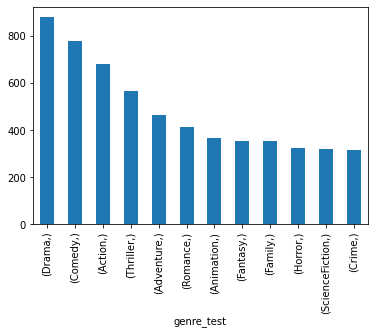

In [58]:
df_exploded.value_counts().plot(kind='bar')


##### classification report and accuracy 

In [59]:
from sklearn import metrics
print("Classification report\n",metrics.classification_report(y_test, y_pred_new))
print("Accuracy of the model : ",metrics.accuracy_score(y_test, y_pred_new)*100)
#9.54 -documentrary
#9.14 -documentary+empty
#9.25 -tvmovie
#9.29 -tvmovie+empty
#9.51 -music
#9.44 -music+empty
#10.37 -history
#9.59 -history+empty
#9.75 -war
#9.30 -war_empty
#11.101 -mystery +empty

Classification report
               precision    recall  f1-score   support

           0       0.65      0.79      0.71       681
           1       0.64      0.58      0.60       466
           2       0.71      0.45      0.55       365
           3       0.51      0.85      0.64       779
           4       0.74      0.39      0.51       314
           5       0.54      0.84      0.66       880
           6       0.72      0.49      0.58       352
           7       0.71      0.37      0.49       353
           8       0.76      0.38      0.51       325
           9       0.66      0.56      0.61       412
          10       0.81      0.44      0.57       318
          11       0.60      0.63      0.62       565

   micro avg       0.61      0.63      0.62      5810
   macro avg       0.67      0.56      0.59      5810
weighted avg       0.64      0.63      0.61      5810
 samples avg       0.61      0.67      0.60      5810

Accuracy of the model :  11.10143665650849


c:\python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
from sklearn import metrics
print("Classification report\n",metrics.classification_report(y_test, y_pred))
print("Accuracy of the model : ",metrics.accuracy_score(y_test, y_pred)*100)

Classification report
               precision    recall  f1-score   support

           0       0.82      0.47      0.60       681
           1       0.82      0.19      0.31       466
           2       0.89      0.09      0.17       365
           3       0.77      0.38      0.51       779
           4       0.82      0.16      0.26       314
           5       0.73      0.38      0.50       880
           6       0.84      0.12      0.21       352
           7       0.80      0.10      0.18       353
           8       1.00      0.10      0.18       325
           9       0.75      0.20      0.31       412
          10       0.93      0.20      0.33       318
          11       0.77      0.21      0.33       565

   micro avg       0.79      0.26      0.39      5810
   macro avg       0.83      0.22      0.32      5810
weighted avg       0.81      0.26      0.37      5810
 samples avg       0.47      0.29      0.34      5810

Accuracy of the model :  9.490639965171964


c:\python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
multilabel_binarizer.inverse_transform(y_pred)

[(),
 (),
 ('Drama',),
 ('Action',),
 ('Action',),
 ('Action', 'ScienceFiction'),
 ('ScienceFiction',),
 (),
 ('Action', 'Crime', 'Thriller'),
 ('Comedy',),
 (),
 ('Adventure', 'Fantasy'),
 ('Drama',),
 (),
 (),
 (),
 (),
 ('Action', 'Thriller'),
 ('Drama', 'Romance'),
 (),
 (),
 ('Comedy',),
 (),
 ('Drama',),
 ('Action',),
 ('Drama',),
 ('Action', 'Crime', 'Drama', 'Thriller'),
 ('Action', 'Adventure', 'Comedy'),
 (),
 ('Drama',),
 (),
 ('Drama',),
 ('Comedy',),
 ('Drama', 'Romance'),
 ('Action',),
 ('Drama',),
 ('Thriller',),
 ('Drama',),
 (),
 ('Action',),
 ('Thriller',),
 ('Comedy', 'Drama', 'Romance'),
 (),
 (),
 ('Comedy', 'Romance'),
 ('Action', 'Thriller'),
 (),
 (),
 (),
 ('Comedy',),
 ('Comedy', 'Drama'),
 ('Drama',),
 ('ScienceFiction',),
 ('Drama',),
 ('Comedy',),
 ('Action', 'Crime', 'Thriller'),
 ('Action',),
 (),
 ('Drama',),
 ('Action',),
 ('Comedy',),
 (),
 (),
 (),
 ('Drama',),
 ('Drama',),
 ('Comedy', 'Drama'),
 (),
 ('Action',),
 ('Drama',),
 ('Action', 'Crime', 'Th